In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU, RNN, Embedding, Concatenate
from tensorflow.keras.layers import Bidirectional, Input, LayerNormalization, Reshape, GlobalAveragePooling1D
from gensim.models import Word2Vec, FastText
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

from sklearn.utils import shuffle
import scikitplot as skplt


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:4', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:5', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:6', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:7', device_type='GPU')]

In [3]:
tf.__version__

'2.3.0'

In [4]:
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)  
    return data
    

In [9]:
import re
df['review'] = df['review'].apply(lambda z: remove_punctuations(z))
df['review'] = df['review'].apply(lambda z: remove_html(z))
df['review'] = df['review'].apply(lambda z: remove_url(z))
df['review'] = df['review'].apply(lambda z: remove_emoji(z))
df['review'] = df['review'].apply(lambda z: remove_abb(z))

In [10]:
X_train = df['review'][:-25000]
y_train = df['sentiment'][:-25000]

X_test = df['review'][-25000:]
y_test = df['sentiment'][-25000:]

In [11]:
X_train.shape

(25000,)

In [12]:
X_train[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Fo

In [13]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [14]:
X_train_text = np.array(pre_process_corpus(X_train))
X_test_text = np.array(pre_process_corpus(X_test))

100%|██████████| 25000/25000 [00:07<00:00, 3235.83it/s]


In [15]:
X_train_text[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda them city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows would not 

In [16]:
def plot_history(history, model, val):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()
    

    y_pred = (model.predict([X_test]*val) > 0.5).astype("int32")
    (skplt.metrics.plot_confusion_matrix(y_pred, y_test, cmap='Oranges', title="Test data"))

    y_pred = (model.predict([X_train]*val) > 0.5).astype("int32")
    (skplt.metrics.plot_confusion_matrix(y_pred, y_train, title="Train data"))



In [17]:
# X_train_text = np.array((X_train))
# X_test_text = np.array((X_test))

vocab_size = 25000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_text)

X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

y_train, X_train = shuffle(y_train, X_train, random_state=42)
y_test, X_test = shuffle(y_test, X_test, random_state=42)

In [18]:
# cnt=0
# for i in tokenizer.word_index:
#     cnt += 1
#     if(cnt>20000):
#         break
#     else:
#         print(i)

In [19]:
vocab_size

25000

In [20]:
class AverageWords(layers.Layer):
    def __init__(self):
        super(AverageWords,self).__init__()
        self.supports_masking = True

    def call(self, x, mask=None):
        axis = K.ndim(x) - 2
        if mask is not None:
            summed = K.sum(x, axis=axis)
            n_words = K.expand_dims(K.sum(K.cast(mask, 'float32'), axis=axis), axis)
            return summed / n_words
        else:
            return K.mean(x, axis=axis)

    def compute_mask(self, inputs, mask=None):
        return None

    def compute_output_shape(self, input_shape):
        dimensions = list(input_shape)
        n_dimensions = len(input_shape)
        del dimensions[n_dimensions - 2]
        return tuple(dimensions)

class WordDropout(layers.Layer):
    def __init__(self, rate):
        super(WordDropout,self).__init__()
        self.rate = min(1., max(0., rate))
        self.supports_masking = True

    def call(self, inputs, training=None):
        if 0. < self.rate < 1.0:
            def dropped_inputs():
                input_shape = K.shape(inputs)
                batch_size = input_shape[0]
                n_time_steps = input_shape[1]
                mask = tf.random.uniform((batch_size, n_time_steps, 1)) >= self.rate
                w_drop = K.cast(mask, 'float32') * inputs
                return w_drop
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

    def get_config(self):
        config = {'rate': self.rate}
        base_config = super().get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [59]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
embed_dim = 32

model = Sequential()
embed_layer = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=maxlen)
model.add(embed_layer)

model.add(WordDropout(0.3))
model.add(AverageWords())

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                epochs=200,
                verbose=True,
                validation_split = 0.2,
                batch_size=200,
                callbacks=[earlystop]
                )


Epoch 1/200
100/100 [==============================] - 1s 14ms/step - loss: 0.6895 - accuracy: 0.5573 - val_loss: 0.6691 - val_accuracy: 0.7614
Epoch 2/200
100/100 [==============================] - 1s 11ms/step - loss: 0.6023 - accuracy: 0.7325 - val_loss: 0.4316 - val_accuracy: 0.8418
Epoch 3/200
100/100 [==============================] - 1s 12ms/step - loss: 0.4266 - accuracy: 0.8282 - val_loss: 0.3255 - val_accuracy: 0.8656
Epoch 4/200
100/100 [==============================] - 1s 13ms/step - loss: 0.3390 - accuracy: 0.8683 - val_loss: 0.3070 - val_accuracy: 0.8734
Epoch 5/200
100/100 [==============================] - 1s 10ms/step - loss: 0.2886 - accuracy: 0.8971 - val_loss: 0.3073 - val_accuracy: 0.8772
Epoch 6/200
100/100 [==============================] - 1s 13ms/step - loss: 0.2594 - accuracy: 0.9138 - val_loss: 0.3210 - val_accuracy: 0.8792
Epoch 7/200
100/100 [==============================] - 1s 9ms/step - loss: 0.2448 - accuracy: 0.9196 - val_loss: 0.3300 - val_accuracy: 

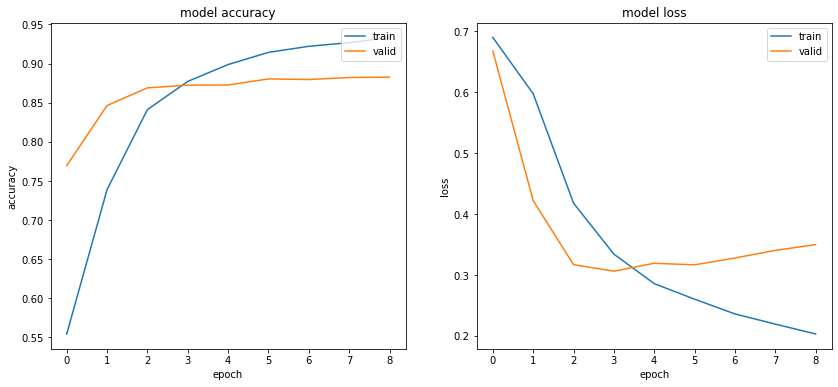

Training Accuracy: 0.9576
Test Accuracy:  0.8878
micro average f1 score:  0.8878000000000001


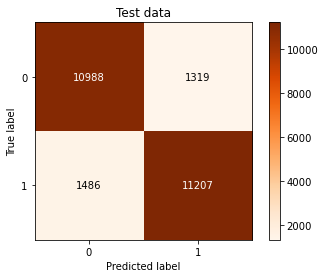

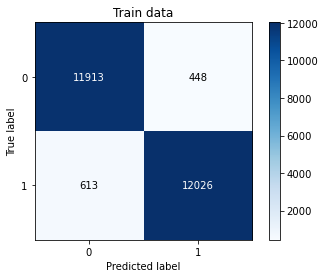

In [52]:
from sklearn.metrics import f1_score

plot_history(history, model, 1)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

y_pred = ((model.predict(X_test)) > 0.5).astype("int32")
print('micro average f1 score: ', f1_score(y_test, y_pred, average='micro'))

In [158]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_50 (Embedding)     (None, 200, 40)           1000000   
_________________________________________________________________
word_dropout_12 (WordDropout (None, 200, 40)           0         
_________________________________________________________________
average_words_11 (AverageWor (None, 40)                0         
_________________________________________________________________
dense_192 (Dense)            (None, 30)                1230      
_________________________________________________________________
dropout_77 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_193 (Dense)            (None, 10)                310       
_________________________________________________________________
dropout_78 (Dropout)         (None, 10)              

# Transformer - Encoder model

In [111]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)


def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates


def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead)
  but it must be broadcastable for addition.

  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable
          to (..., seq_len_q, seq_len_k). Defaults to None.

  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights


class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights


class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

    return out2


class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding,
                                            self.d_model)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]

    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  # (batch_size, input_seq_len, d_model)



In [163]:
encoder_block = Encoder(num_layers=3, d_model=40, num_heads=5,
                         dff=25, input_vocab_size=vocab_size,
                         maximum_position_encoding=maxlen)

In [164]:
inputs = Input(shape=(maxlen,))
enc_padding_mask = create_padding_mask(inputs)
x = encoder_block(inputs, training=True, mask = enc_padding_mask)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [165]:
model.summary()

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 200)]        0                                            
__________________________________________________________________________________________________
tf_op_layer_Equal_13 (TensorFlo [(None, 200)]        0           input_16[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_Cast_13 (TensorFlow [(None, 200)]        0           tf_op_layer_Equal_13[0][0]       
__________________________________________________________________________________________________
tf_op_layer_strided_slice_13 (T [(None, 1, 1, 200)]  0           tf_op_layer_Cast_13[0][0]        
______________________________________________________________________________________

In [166]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(
  X_train, y_train, batch_size=32, epochs=200, validation_split=0.2,
  callbacks=[earlystop]
)

Epoch 1/200
625/625 [==============================] - 16s 25ms/step - loss: 0.7016 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 2/200
625/625 [==============================] - 16s 26ms/step - loss: 0.6936 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 3/200
625/625 [==============================] - 16s 25ms/step - loss: 0.6936 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 4/200
625/625 [==============================] - 16s 25ms/step - loss: 0.6935 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5014
Epoch 5/200
625/625 [==============================] - 16s 26ms/step - loss: 0.6404 - accuracy: 0.5782 - val_loss: 0.3937 - val_accuracy: 0.8054
Epoch 6/200
625/625 [==============================] - 15s 25ms/step - loss: 0.3483 - accuracy: 0.8735 - val_loss: 0.3225 - val_accuracy: 0.8698
Epoch 7/200
625/625 [==============================] - 16s 26ms/step - loss: 0.2419 - accuracy: 0.9247 - val_loss: 0.3682 - val_ac

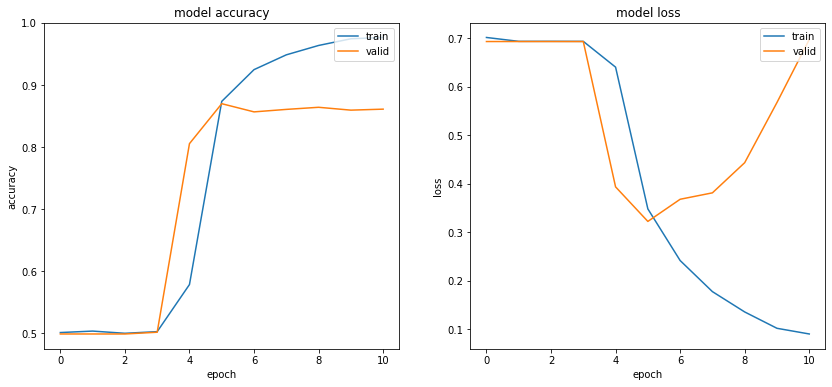

Test Accuracy:  0.8620
micro average f1 score:  0.863


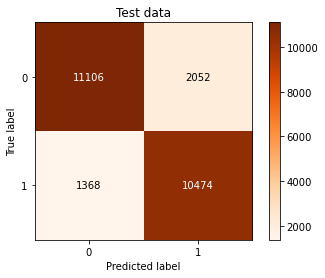

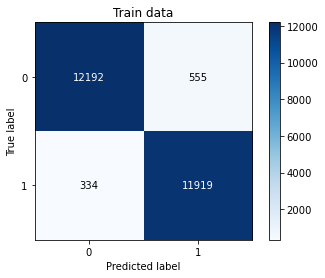

In [167]:
plot_history(history, model, 1)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))
y_pred = ((model.predict(X_test)) > 0.5).astype("int32")
print('micro average f1 score: ', f1_score(y_test, y_pred, average='micro'))